In [144]:
# Reload files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Map generator prototype

This is a test python jupyter notebook to test generating maps for `Impatient drivers simulation`

map-pieces will contain a folder with map pieces imagesd and a json file containing data about each piece.

- each pece is 100x100 pixels

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt

import cv2 as cv
import numpy as np
import json

from pprint import pprint

In [146]:
# Local Import
from src.Map.MapGrid import MapGrid
from src.Map.MapHelper import *

In [147]:
# Vars
map_pieces_folder = "map_pieces"
map_pieces_info_path = f"{map_pieces_folder}/pieces_info.json"

In [148]:
# load json assets file
with open(map_pieces_info_path, "r") as f:
    map_pieces = json.loads(f.read())

In [149]:
# Parse Json
for piece in map_pieces["Pieces"]:
    print(piece["name"], "Path:", piece["image_path"])

    # Load Map Images
    piece["image"] = cv.imread(f'{map_pieces_folder}/{piece["image_path"]}')

Straight Path: Straight.png
Turn Path: Turn.png
3WayIntersection Path: 3WayIntersection.png
4WayIntersection Path: 4WayIntersection.png
Roundabout Path: Roundabout.png
Filler Path: Filler.png
BigDiagonalLeft Path: BigDiagonalLeft.png
BigDiagonalRight Path: BigDiagonalRight.png


In [150]:
# Init MapGrid
testMap = MapGrid(map_pieces)

Initilizing Map
Process Data for set: Basic Roads


Border coords: ((0, 0), (0, 0))
Map dimensions: ((1, 1), (0, 0), (0, 0))
Map pixels: w:100, h:100
Start coords: (0, 0)


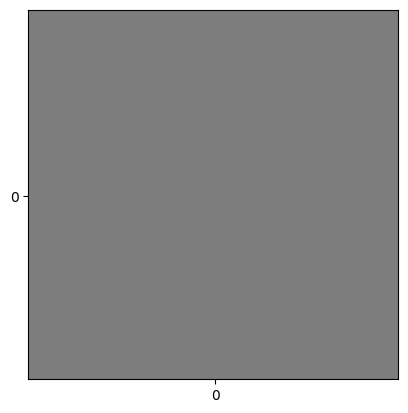

In [151]:
# Map Drawing
def draw_map(mapGrid: MapGrid):
    map_size, start_coords, end_coords = mapGrid.getDimensions()
    piece_size = 100

    map_w = map_size[0] * piece_size
    map_h = map_size[1] * piece_size
    print(f"Map pixels: w:{map_w}, h:{map_h}")
    
    plt.imshow(mapGrid.renderMap())
    plt.xticks(range(int(piece_size/2), map_w, piece_size), labels = range(start_coords[0], start_coords[0] + map_size[0]))
    plt.yticks(range(int(piece_size/2), map_h, piece_size), labels = range(start_coords[1] + map_size[1] - 1,start_coords[1] -1, -1));

# Coords
print("Border coords:", testMap.getBorderCoords())
print("Map dimensions:", testMap.getDimensions())
draw_map(testMap)

images to load - 4


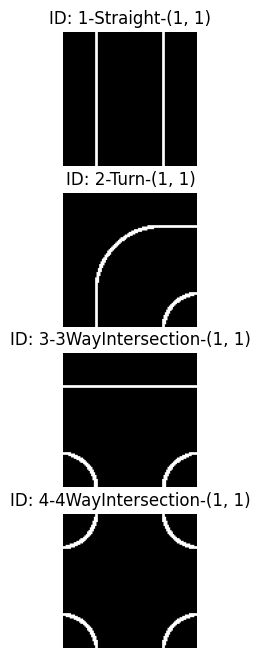

In [152]:
# Load map images:
n_limit = 4 # limit the pics
n_pictures = min(len(testMap.pieces), n_limit)
print(f"images to load - {n_pictures}")

picture_ids = list(testMap.pieces.keys())[:n_pictures]

fig, ax = plt.subplots(nrows=n_pictures,
                       ncols=1,
                       figsize = (2, n_pictures*2))

# Plot  for each different axis
for i in range(n_pictures):
    title = f'ID: {testMap.pieces[picture_ids[i]].id}-{testMap.pieces[picture_ids[i]].name}-{testMap.pieces[picture_ids[i]].size}'
    ax[i].set(title=title)
    ax[i].imshow(testMap.pieces[picture_ids[i]].image)
    ax[i].axis('off')

Initilizing Map
Process Data for set: Basic Roads
Border coords: ((-3, -2), (3, 2))
Map pixels: w:700, h:500
Start coords: (-3, -2)


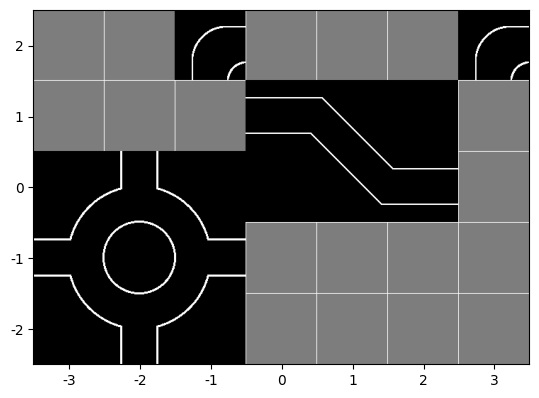

In [153]:
testMap = MapGrid(map_pieces)

elements_list = [
(8, 3, (0,0)),
(5, 3, (-3,-2)),
(2, 0, (3,2)),
(2, 0, (-1,2))  
]

for item in elements_list:
    testMap.addItem(item[0], item[1], item[2])

# Coords
print("Border coords:", testMap.getBorderCoords())

draw_map(testMap)

In [154]:
testMap = MapGrid(map_pieces)

elements_list = [
(7, 0, (0,0)),
#(1, 0, (4,5)),
#(3, 0, (4,6)),
(5, 0, (10,-4)),
#(20, 0, (4,5)),
#(5, 0, (-2, -2)),
(8, 1, (3, 2))
]

for item in elements_list:
    try:
        testMap.addItem(item[0], item[1], item[2])
    except Exception as e:
        print(f"unable to add {item}, {e}")

Initilizing Map
Process Data for set: Basic Roads


Map pixels: w:600, h:400
Start coords: (0, 0)


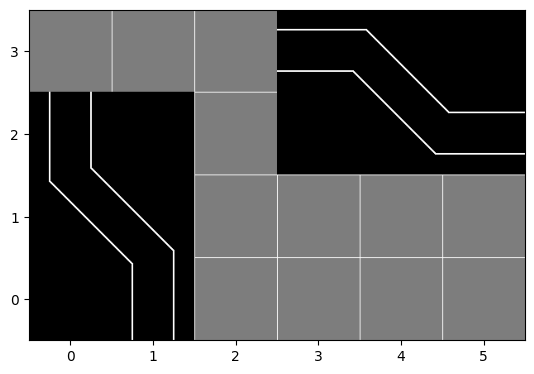

In [155]:
coords = (0, 0)
size = (0, 0)

if not testMap.checkCoords(coords, size):
    print("occupied")
    elementsInArea = testMap.getItemsFromCoords(coords, size)
    print("Elements")
    for element in elementsInArea:
        print(element, "Name:" ,testMap.pieces[element['ID']].name)


draw_map(testMap)

Name: BigDiagonalLeft
Coords: (0, 0)
Size: (2, 3)
Rotation: 0
Rotated Size: (2, 3)
Connections :
Connection: ((1, 0), (0, -1)), Rotated Connections:((1, 0), (0, -1)), ADjusted coords:(1, 0)
Connection: ((0, 2), (0, 1)), Rotated Connections:((0, 2), (0, 1)), ADjusted coords:(0, 2)

Name: BigDiagonalRight
Coords: (3, 2)
Size: (2, 3)
Rotation: 1
Rotated Size: (2, 3)
Connections :
Connection: ((0, 0), (0, -1)), Rotated Connections:((0, 1), (-1, 0)), ADjusted coords:(3, 3)
Connection: ((1, 2), (0, 1)), Rotated Connections:((2, 0), (1, 0)), ADjusted coords:(5, 2)

Map pixels: w:600, h:400
Start coords: (0, 0)


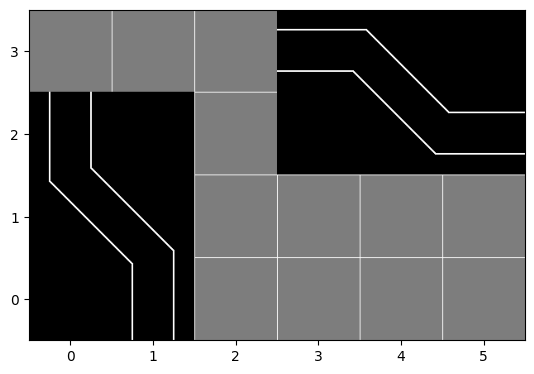

In [159]:
def getConnectionPoints(self: MapGrid):

    # get connection points
    for element in self.mapElements:
        elementName = self.pieces[element['ID']].name
        elementConnections = self.pieces[element['ID']].connections
        elementSize = self.pieces[element['ID']].size

        #print(f"Found ID: {elementID}")
        print(f"Name: {elementName}")
        print(f"Coords: {element['coords']}")
        print(f"Size: {elementSize}")
        print(f"Rotation: {element['rotation']}")

        # Rotated size
        print(f"Rotated Size: {elementSize}")

        # Rotated connections:
        print(f"Connections :")
        for connection in elementConnections:
            rotatedConnectionCords = rotate_coords(connection[0], elementSize, element['rotation'])



            adjusted_size_coords = (rotatedConnectionCords[0] + element['coords'][0], rotatedConnectionCords[1] + element['coords'][1])

            rotatedConnectionDirection =  get_rotated(connection[1], element['rotation'])
            rotatedConnection = (rotatedConnectionCords, rotatedConnectionDirection)

            print(f"Connection: {connection}, Rotated Connections:{rotatedConnection}, Adjusted coords:{adjusted_size_coords}")

            

        print("")

getConnectionPoints(testMap)
draw_map(testMap)

In [157]:


testConTable = (
    ((0,0), (0,1)),
    ((0,1), (1,1)),
    ((0,2), (1,2)),
    )

sizeX = len(testConTable[0])
sizeY = len(testConTable)

print(f"Size: {sizeX}x{sizeY}")

rotations = 5
for n in range (rotations):
    print(f"rotation {n}")

    rotated_coords = []

    for row in testConTable:
        new_row = []
        for coords in row:
            new_coords = rotate_coords(coords, (sizeX, sizeY), n)
            new_row.append(new_coords)

        rotated_coords.append(new_row)

    print("Rotated Coords")
    pprint(testConTable)
    pprint(rotated_coords)

Size: 2x3
rotation 0
Rotated Coords
(((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 2), (1, 2)))
[[(0, 0), (0, 1)], [(0, 1), (1, 1)], [(0, 2), (1, 2)]]
rotation 1
Rotated Coords
(((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 2), (1, 2)))
[[(0, 1), (1, 1)], [(1, 1), (1, 0)], [(2, 1), (2, 0)]]
rotation 2
Rotated Coords
(((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 2), (1, 2)))
[[(1, 2), (1, 1)], [(1, 1), (0, 1)], [(1, 0), (0, 0)]]
rotation 3
Rotated Coords
(((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 2), (1, 2)))
[[(2, 0), (1, 0)], [(1, 0), (1, 1)], [(0, 0), (0, 1)]]
rotation 4
Rotated Coords
(((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 2), (1, 2)))
[[(0, 0), (0, 1)], [(0, 1), (1, 1)], [(0, 2), (1, 2)]]
